In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('oil_spill.csv')

In [4]:
df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [5]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


### Checking shape  of the dataframe

In [6]:
df.shape

(937, 50)

### Checking and handeling null values

In [7]:
df.isnull().sum()

f_1       0
f_2       0
f_3       0
f_4       0
f_5       0
f_6       0
f_7       0
f_8       0
f_9       0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
f_31      0
f_32      0
f_33      0
f_34      0
f_35      0
f_36      0
f_37      0
f_38      0
f_39      0
f_40      0
f_41      0
f_42      0
f_43      0
f_44      0
f_45      0
f_46      0
f_47      0
f_48      0
f_49      0
target    0
dtype: int64

### Checking the datatypes

In [8]:
df.dtypes

f_1         int64
f_2         int64
f_3       float64
f_4       float64
f_5         int64
f_6         int64
f_7       float64
f_8       float64
f_9       float64
f_10      float64
f_11      float64
f_12      float64
f_13      float64
f_14      float64
f_15      float64
f_16      float64
f_17      float64
f_18      float64
f_19      float64
f_20      float64
f_21      float64
f_22      float64
f_23        int64
f_24      float64
f_25      float64
f_26      float64
f_27      float64
f_28      float64
f_29      float64
f_30      float64
f_31      float64
f_32      float64
f_33      float64
f_34      float64
f_35        int64
f_36        int64
f_37      float64
f_38      float64
f_39        int64
f_40        int64
f_41      float64
f_42      float64
f_43      float64
f_44      float64
f_45      float64
f_46        int64
f_47      float64
f_48      float64
f_49      float64
target      int64
dtype: object

### Checking if any duplicate value is present on the dataset

In [9]:
df.duplicated().sum()

0

### EDA

In [10]:
r=df['target'].value_counts()
print(r)

0    896
1     41
Name: target, dtype: int64


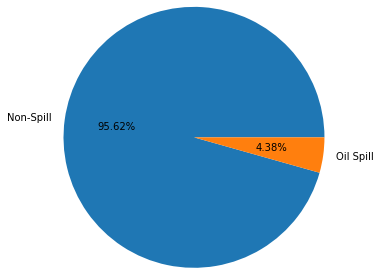

In [11]:
plt.pie(r,labels=['Non-Spill','Oil Spill'],autopct='%.2f%%',radius=1.5)
plt.show()

In [12]:
df.columns

Index(['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10',
       'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19',
       'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28',
       'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37',
       'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46',
       'f_47', 'f_48', 'f_49', 'target'],
      dtype='object')

### Selecting Independent and Dependent features

In [13]:
x=df.drop('target',axis=1)
y=df['target']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(937, 49)
(937,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### Splitting data into training and test data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(702, 49)
(235, 49)
(702,)
(235,)


### Applying StandardScaler on x_test and x_train

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc=StandardScaler()

In [18]:
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)

In [19]:
x_train_scaled

array([[-0.83271418, -0.07676172, -0.82004385, ...,  0.93618542,
        -2.39367351,  2.20409741],
       [-1.04326539,  0.37391696,  0.6534051 , ..., -0.35173765,
         0.44070422, -0.32524148],
       [ 0.43059308, -0.154186  , -1.1663867 , ..., -0.50323835,
         0.38683308, -0.64777462],
       ...,
       [ 1.40815227, -0.16111952, -0.99624899, ..., -0.81871082,
         0.41896674, -0.61721885],
       [ 0.3102781 , -0.04324971,  0.80450713, ..., -0.41988094,
         0.41802163, -0.25394468],
       [-0.83271418,  0.50160925,  1.60185577, ..., -0.66869723,
         0.45393572, -0.11135107]])

In [20]:
x_test_scaled

array([[ 0.62893801, -0.12160272,  1.19248273, ...,  1.02304339,
         0.40051246, -0.15295389],
       [-0.80407633, -0.04705461,  0.57645883, ..., -0.32209201,
         0.39746728, -0.28230114],
       [-0.00425437, -0.18338292, -1.09063478, ..., -0.6866255 ,
         0.3994974 , -0.72064459],
       ...,
       [-0.22087282, -0.16979128,  0.69102985, ...,  0.80420501,
         0.358895  , -0.17810474],
       [ 1.22880448, -0.1656726 ,  0.35593717, ..., -0.66283491,
         0.3690456 , -0.28589412],
       [ 0.27901591, -0.16114205,  1.18160701, ...,  0.06713421,
         0.38122632, -0.07390835]])

In [21]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [22]:
x_train_scaled

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49
0,-0.832714,-0.076762,-0.820044,2.237677,-1.674751,-0.128096,-1.136853,-0.741130,-0.199163,0.102687,...,1.813686,-0.929531,-0.606995,-0.476501,-0.836884,-0.950550,-0.371165,0.936185,-2.393674,2.204097
1,-1.043265,0.373917,0.653405,1.045381,-0.674309,0.427306,-0.162720,-0.268838,0.864103,-0.237878,...,-0.403573,2.530013,0.636724,0.642435,0.425119,0.150742,-0.371165,-0.351738,0.440704,-0.325241
2,0.430593,-0.154186,-1.166387,-1.257099,-1.185646,-0.138880,0.850409,3.433139,-0.284924,1.919037,...,-0.761196,-0.395609,-0.137834,-0.076099,0.231869,-0.475035,-0.371165,-0.503238,0.386833,-0.647775
3,-0.351454,0.064220,0.985496,0.739019,-0.407524,0.076353,-0.315586,-0.611038,0.606577,-0.464922,...,-0.403573,2.303824,0.104974,0.016985,0.057783,1.381375,2.694220,-0.207176,0.435979,-0.226784
4,0.220042,-0.060584,0.414125,-0.020646,-0.074043,-0.065075,-0.303107,-0.418727,0.024714,-0.351400,...,0.168623,0.308190,0.130217,0.101388,0.246684,-0.187824,-0.371165,-0.676405,0.410461,-0.328637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,-0.712399,-0.105651,-1.163103,-0.928420,-0.429756,0.039320,1.114026,3.390717,0.259646,1.691993,...,-0.761196,0.586164,0.504766,0.288585,0.736332,-0.244886,-0.371165,-0.752602,0.408571,-0.705491
698,-0.306336,-0.136852,1.509194,1.136604,-0.251900,-0.151504,-0.905213,-1.091814,-0.219450,-0.578444,...,-0.403573,-0.028113,-0.445355,-0.315731,-0.579862,1.044711,2.694220,-0.566153,0.449210,-0.124931
699,1.408152,-0.161120,-0.996249,-0.829023,-0.674309,-0.164337,0.729520,-0.336713,-0.361453,-0.805488,...,-0.761196,-0.520037,-0.606995,-0.476501,-0.836884,-0.950550,2.694220,-0.818711,0.418967,-0.617219
700,0.310278,-0.043250,0.804507,0.189765,1.348808,-0.045432,-0.923152,-0.613866,0.319897,-0.010835,...,-1.547965,0.170962,0.796614,0.691690,1.258509,-0.615788,-0.371165,-0.419881,0.418022,-0.253945


In [23]:
x_test_scaled

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49
0,0.628938,-0.121603,1.192483,1.036801,1.498428,-0.137481,-0.101081,0.163457,-0.148811,0.091737,...,0.204646,-0.201568,0.282198,0.164556,0.830730,-0.681196,-0.418330,1.023043,0.400512,-0.152954
1,-0.804076,-0.047055,0.576459,0.942007,0.075504,-0.020125,-0.197262,-0.227468,0.057750,-0.219199,...,-0.393696,0.483872,0.385818,0.433692,0.249666,-0.500536,-0.418330,-0.322092,0.397467,-0.282301
2,-0.004254,-0.183383,-1.090635,-0.481661,0.312658,-0.207143,2.199166,1.095252,-0.378169,-0.322845,...,0.952573,-0.432315,-0.231570,-0.189327,-0.146514,-0.420764,-0.418330,-0.686626,0.399497,-0.720645
3,-0.704099,-0.179676,-1.026049,-0.544506,-1.627693,-0.188236,0.349916,-0.195337,-0.360787,-0.426491,...,0.503817,-0.240048,-0.231570,-0.142385,-0.227754,-0.277644,-0.418330,-0.548081,0.397467,-0.666750
4,-0.904054,-0.096891,0.317680,0.855841,-0.334126,-0.098579,-0.109972,-1.116422,0.048933,-1.048365,...,-0.393696,0.546556,-0.004424,0.063393,-0.094419,0.013289,-0.418330,0.189900,0.393407,-0.339789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,-1.137335,-0.175146,-0.468029,-1.083904,1.951177,-0.165128,1.107235,1.614700,-0.183448,0.506320,...,0.952573,0.179950,-0.346931,-0.224413,-0.328362,0.721850,2.390457,2.584885,0.372091,-0.185291
231,-0.137558,-0.185442,-1.043239,-0.486846,-0.183210,-0.217647,2.376170,0.859625,-0.417466,-0.530136,...,0.952573,-0.484947,-0.346931,-0.259070,-0.384465,-0.284683,-0.418330,-0.721578,0.400512,-0.688308
232,-0.220873,-0.169791,0.691030,-0.491112,0.959442,-0.213341,-0.067944,-0.958445,-0.373005,-0.944719,...,0.204646,-0.470358,-0.115491,-0.126755,-0.087497,-0.601424,-0.418330,0.804205,0.358895,-0.178105
233,1.228804,-0.165673,0.355937,0.000229,-0.441923,-0.206858,-0.315265,-0.931669,-0.294915,-0.841073,...,0.204646,-0.456301,-0.115491,-0.135947,0.099937,-0.568577,-0.418330,-0.662835,0.369046,-0.285894


### Creating functions to evaluate confusion matrix,classification report,accuracy score

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [25]:
def cls_eval(ytest,ypred):
    cm=confusion_matrix(ytest,ypred)
    print(cm)
    print('Accuracy Score',accuracy_score(ytest,ypred))
    print('Classification report \n',classification_report(ytest,ypred))
    
    
def mscore(model):
    print('Training score',model.score(x_train_scaled,y_train))
    print('Testing score',model.score(x_test_scaled,y_test))
    
def coef_inter(model):
    print('Model Coefficient',model.coef_)
    print('Model Intercept',model.intercept_)  

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

### Building LogisicRegression Model

In [27]:
log_reg=LogisticRegression(max_iter=1000,solver='liblinear')
log_reg.fit(x_train_scaled,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [28]:
mscore(log_reg)

Training score 0.9757834757834758
Testing score 0.9531914893617022


In [29]:
ypred_log_reg=log_reg.predict(x_test_scaled)

In [30]:
cls_eval(y_test,ypred_log_reg)

[[218   3]
 [  8   6]]
Accuracy Score 0.9531914893617022
Classification report 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       221
           1       0.67      0.43      0.52        14

    accuracy                           0.95       235
   macro avg       0.82      0.71      0.75       235
weighted avg       0.95      0.95      0.95       235



### Building Bagging model

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [32]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=20)

In [33]:
bc=BaggingClassifier(base_estimator=dt,n_estimators=15,max_samples=x_train_scaled.shape[0],max_features=x_train_scaled.shape[1],random_state=2022)

In [34]:
bc.fit(x_train_scaled,y_train)

D:\New folder (3)\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        min_samples_split=20),
                  max_features=49, max_samples=702, n_estimators=15,
                  random_state=2022)

In [35]:
mscore(bc)

Training score 0.9772079772079773
Testing score 0.9446808510638298


In [36]:
ypred_bc=bc.predict(x_test_scaled)

In [37]:
cls_eval(y_test,ypred_bc)

[[218   3]
 [ 10   4]]
Accuracy Score 0.9446808510638298
Classification report 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       221
           1       0.57      0.29      0.38        14

    accuracy                           0.94       235
   macro avg       0.76      0.64      0.68       235
weighted avg       0.93      0.94      0.94       235



### Building the Ensemble model

In [38]:
from sklearn.ensemble import AdaBoostClassifier

In [39]:
ada_boost=AdaBoostClassifier(base_estimator=dt,n_estimators=80)
ada_boost.fit(x_train_scaled,y_train)

D:\New folder (3)\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         min_samples_split=20),
                   n_estimators=80)

In [40]:
mscore(ada_boost)

Training score 1.0
Testing score 0.948936170212766


In [41]:
ypred_ada=ada_boost.predict(x_test_scaled)

In [42]:
cls_eval(y_test,ypred_ada)

[[220   1]
 [ 11   3]]
Accuracy Score 0.948936170212766
Classification report 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       221
           1       0.75      0.21      0.33        14

    accuracy                           0.95       235
   macro avg       0.85      0.60      0.65       235
weighted avg       0.94      0.95      0.94       235



### Inference
Based on Accuracy, AdaBoost Classifier performs better compared to other models generating an accuracy of 97%.

### Saving the AdaBoost Model

In [43]:
import pickle

In [44]:
pickle.dump(ada_boost,open('ada_boost.pkl','wb'))

### Loading the AdaBoost Model

In [45]:
loaded_model=pickle.load(open('ada_boost.pkl','rb'))

In [46]:
test_acc=loaded_model.score(x_test,y_test)
print(test_acc)

0.9404255319148936


### Getting samples from dataset

In [47]:
sample=df.sample(20)
sample

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
378,105,79,836.44,1179.77,53,197500,41.81,8.45,2870.0,0.20,...,820.06,390.51,188.31,133.55,4.35,0,4207.96,65.99,6.97,0
211,23,189,1159.69,327.69,52,472500,27.30,5.86,5200.0,0.21,...,2140.09,320.16,152.42,87.92,14.04,1,7573.28,65.64,7.62,0
222,56,139,1236.71,942.19,91,347500,32.04,5.64,3660.0,0.18,...,850.00,950.00,352.94,309.47,2.41,0,4920.93,65.93,7.50,0
334,44,163,914.44,914.24,123,407500,41.26,6.28,3670.0,0.15,...,610.33,583.10,390.18,106.76,1.56,0,3142.98,65.88,7.15,0
412,151,64,991.70,1018.53,175,160000,37.52,9.27,1400.0,0.25,...,450.00,300.00,255.56,46.40,1.76,0,2914.09,65.94,7.20,0
170,161,53,1696.45,1065.15,109,132500,34.34,6.36,1790.0,0.18,...,632.46,316.23,153.56,90.22,4.12,0,4503.33,66.09,8.05,0
765,33,20,131.45,413.20,74,162000,49.05,6.81,1821.0,0.14,...,829.76,90.00,80.00,30.00,10.37,1,2900.26,65.93,6.47,0
790,58,19,97.37,315.16,71,153900,47.74,11.15,1551.0,0.23,...,655.21,180.00,115.71,43.92,5.66,0,3286.61,65.79,6.46,0
446,14,1366,1274.10,1697.37,163,1920937,23.77,10.76,9433.0,0.45,...,0.00,0.00,0.00,0.00,0.00,0,10120.33,36.90,14.99,0
830,98,25,4.72,447.24,65,202500,57.80,15.55,1768.0,0.27,...,886.40,284.60,131.62,94.13,6.73,0,2593.15,65.92,6.03,0


In [48]:
sample.to_csv('sample.csv')

In [49]:
sample

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
378,105,79,836.44,1179.77,53,197500,41.81,8.45,2870.0,0.20,...,820.06,390.51,188.31,133.55,4.35,0,4207.96,65.99,6.97,0
211,23,189,1159.69,327.69,52,472500,27.30,5.86,5200.0,0.21,...,2140.09,320.16,152.42,87.92,14.04,1,7573.28,65.64,7.62,0
222,56,139,1236.71,942.19,91,347500,32.04,5.64,3660.0,0.18,...,850.00,950.00,352.94,309.47,2.41,0,4920.93,65.93,7.50,0
334,44,163,914.44,914.24,123,407500,41.26,6.28,3670.0,0.15,...,610.33,583.10,390.18,106.76,1.56,0,3142.98,65.88,7.15,0
412,151,64,991.70,1018.53,175,160000,37.52,9.27,1400.0,0.25,...,450.00,300.00,255.56,46.40,1.76,0,2914.09,65.94,7.20,0
170,161,53,1696.45,1065.15,109,132500,34.34,6.36,1790.0,0.18,...,632.46,316.23,153.56,90.22,4.12,0,4503.33,66.09,8.05,0
765,33,20,131.45,413.20,74,162000,49.05,6.81,1821.0,0.14,...,829.76,90.00,80.00,30.00,10.37,1,2900.26,65.93,6.47,0
790,58,19,97.37,315.16,71,153900,47.74,11.15,1551.0,0.23,...,655.21,180.00,115.71,43.92,5.66,0,3286.61,65.79,6.46,0
446,14,1366,1274.10,1697.37,163,1920937,23.77,10.76,9433.0,0.45,...,0.00,0.00,0.00,0.00,0.00,0,10120.33,36.90,14.99,0
830,98,25,4.72,447.24,65,202500,57.80,15.55,1768.0,0.27,...,886.40,284.60,131.62,94.13,6.73,0,2593.15,65.92,6.03,0


In [50]:
x=sample.drop(['target'],axis=1)
y=sample['target']

### Standardizing the sample data

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
sc=StandardScaler()

In [53]:
x_scaled=sc.fit_transform(x)

In [54]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

In [55]:
x_scaled

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49
0,0.570887,-0.322672,0.027587,0.585265,-0.966171,-0.395454,0.042353,-0.242802,-0.215783,-0.349906,...,0.504065,-0.168846,-0.028660,-0.207768,0.270562,-0.198579,-0.420084,-0.343033,0.332052,-0.335044
1,-1.007957,-0.044070,0.594855,-1.262593,-0.991935,-0.053635,-1.403617,-0.977446,0.372859,-0.229249,...,-1.416181,1.209284,-0.249795,-0.399634,-0.227551,2.426561,2.380476,0.757753,0.292004,-0.074543
2,-0.372568,-0.170707,0.730017,0.070038,0.012882,-0.209007,-0.931260,-1.039849,-0.016200,-0.591220,...,-1.416181,-0.137588,1.730019,0.672337,2.190968,-0.724149,-0.420084,-0.109823,0.325187,-0.122636
3,-0.603619,-0.109921,0.164468,0.009425,0.837348,-0.134428,-0.012457,-0.858315,-0.013674,-0.953192,...,0.504065,-0.387807,0.576720,0.871420,-0.021887,-0.954424,-0.420084,-0.691385,0.319465,-0.262905
4,1.456579,-0.360663,0.300051,0.235593,2.177105,-0.442066,-0.385160,-0.010211,-0.587158,0.253380,...,0.504065,-0.555194,-0.313165,0.151748,-0.680799,-0.900242,-0.420084,-0.766254,0.326331,-0.242867
5,1.649121,-0.388523,1.536811,0.336695,0.476644,-0.476248,-0.702057,-0.835623,-0.488630,-0.591220,...,-0.136017,-0.364703,-0.262148,-0.393540,-0.202444,-0.260889,-0.420084,-0.246418,0.343494,0.097788
6,-0.815415,-0.472104,-1.209594,-1.077152,-0.425115,-0.439580,0.763842,-0.707982,-0.480798,-1.073849,...,-0.536069,-0.158719,-0.973271,-0.786789,-0.859827,1.432313,2.380476,-0.770778,0.325187,-0.535429
7,-0.334060,-0.474637,-1.269401,-1.289766,-0.502409,-0.449648,0.633297,0.523044,-0.549010,0.012066,...,-0.536069,-0.340952,-0.690368,-0.595884,-0.707871,0.156316,-0.420084,-0.644404,0.309167,-0.539437
8,-1.181244,2.936973,0.795633,1.707754,1.867930,1.746745,-1.755393,0.412422,1.442268,2.666524,...,2.264290,-1.025000,-1.256173,-1.214465,-1.187318,-1.377047,-0.420084,1.590886,-2.996476,2.879135
9,0.436107,-0.459440,-1.431991,-1.003331,-0.656996,-0.389240,1.635809,1.771090,-0.494188,0.494695,...,-0.536069,-0.099586,-0.361573,-0.510830,-0.159761,0.446193,-0.420084,-0.871233,0.324042,-0.711768


### Loading the sample model

In [56]:
import pickle

In [57]:
loaded_model=pickle.load(open('ada_boost.pkl','rb'))

In [58]:
prediction=loaded_model.predict(x_scaled)

In [59]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [60]:
model={'Actual value':y,
       'Predicted value':prediction}
pred=pd.DataFrame(model)

In [61]:
pred

,Actual value,Predicted value
378,0,0
211,0,0
222,0,0
334,0,0
412,0,0
170,0,0
765,0,0
790,0,0
446,0,0
830,0,0
